plots of SOG model run
- 1100 x 10 x 101 domain
- 1 day
- river on

In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runSOG2d_exp/SOG2D_1ts_20041019_20041019_ptrc_T.nc')
f2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runSOG2d_exp/SOG2D_1ts_20041019_20041019_grid_T.nc')
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
e=int(len(t))#/4)
tt,tz=np.meshgrid(t[0:e],-z[:])
xt,yt=np.meshgrid(lons,lats)

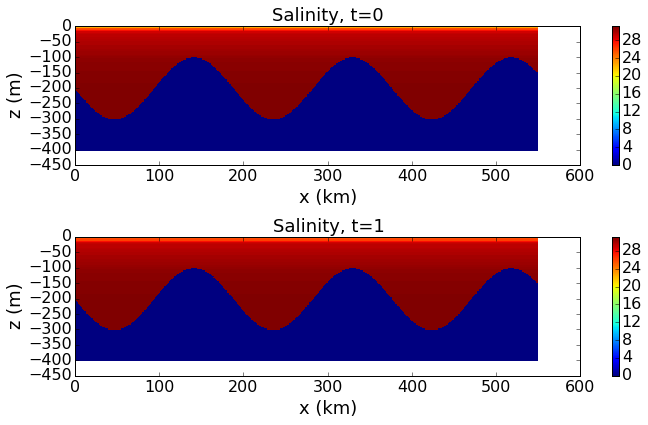

In [3]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f2.variables['vosaline'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity, t=0', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -50, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f2.variables['vosaline'][1,:,5,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity, t=1', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -50, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

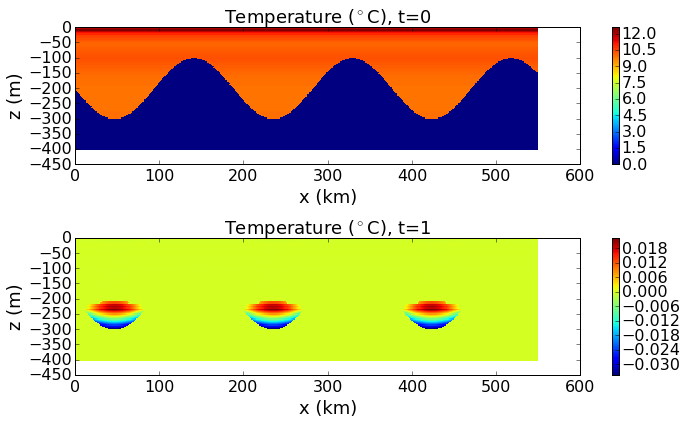

In [4]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f2.variables['votemper'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Temperature ($^\circ$C), t=0', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -50, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f2.variables['votemper'][e-1,:,5,:]-f2.variables['votemper'][0,:,5,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Temperature ($^\circ$C), t=1', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -50, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

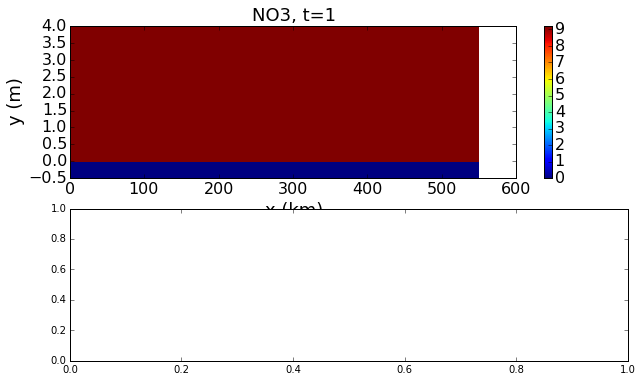

In [5]:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        mesh0=axs[0].pcolormesh(xt,yt,f.variables['NO3'][1,0,:,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('y (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title('NO3, t=1', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

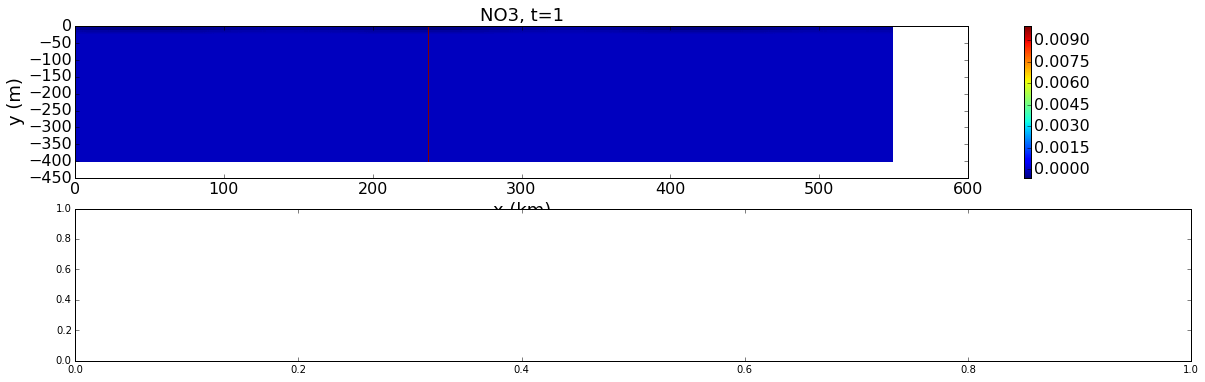

In [6]:
        fig, axs = plt.subplots(2,1,figsize=(20,6))
        d=f.variables['PHY2'][1,:,5,:]-f.variables['PHY2'][0,:,5,:]
        d[:,475]=0.01
        mesh0=axs[0].pcolormesh(xx,zz,d)
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('y (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title('NO3, t=1', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

NO3
NH4
Si
PHY2
PHY
MYRI
MICZ
DOC
POC
bSi
O2
sog_light
sog_1
sog_2
sog_3
sog_4
sog_5
sog_6


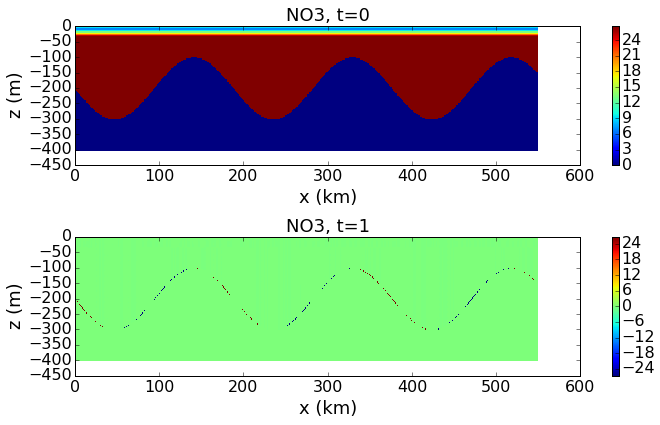

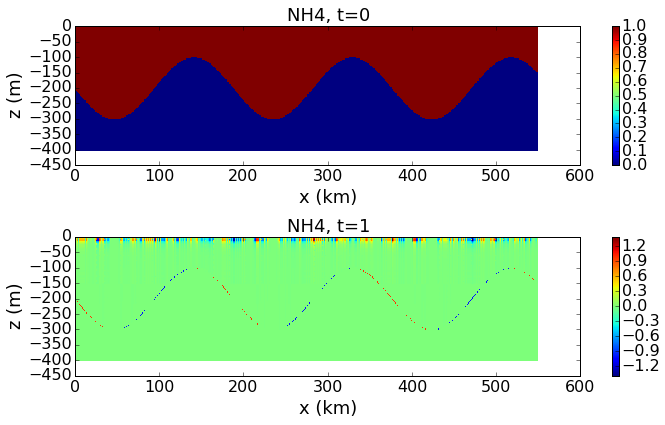

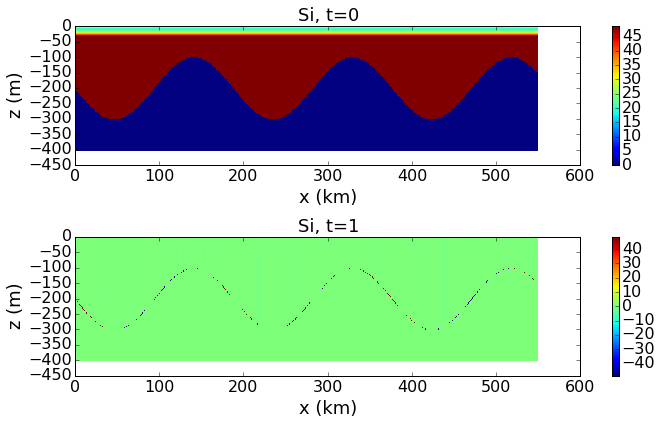

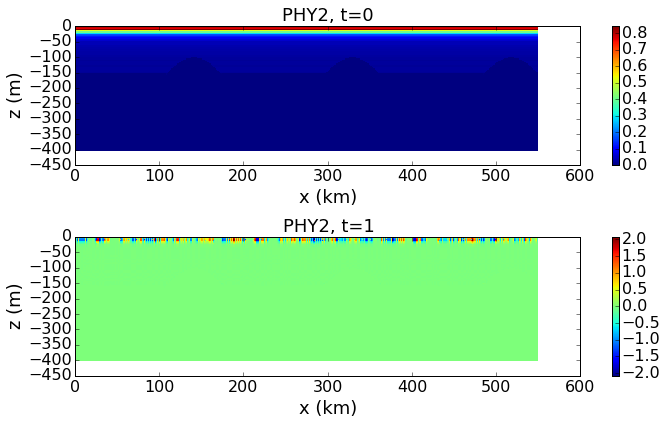

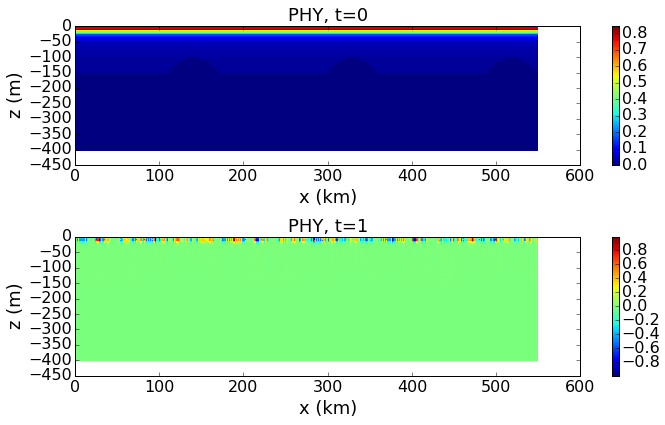

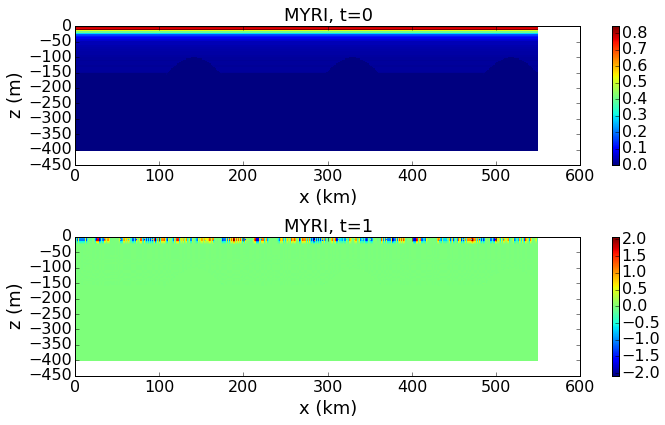

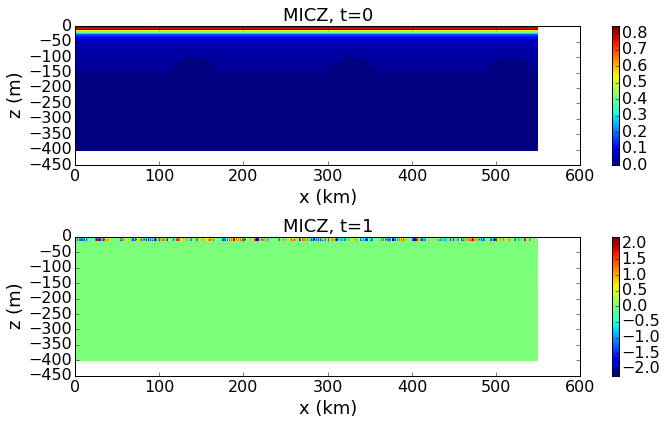

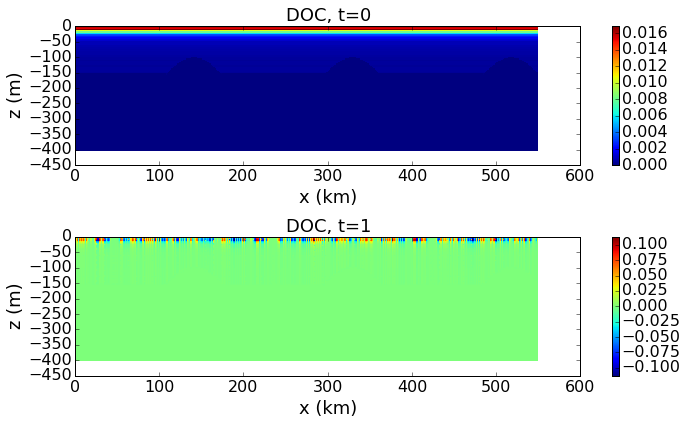

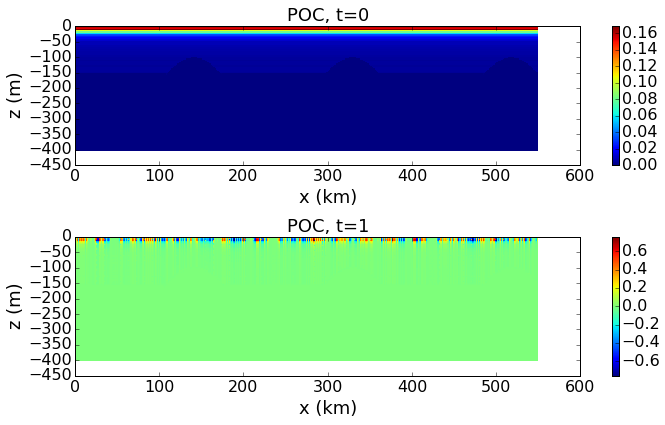

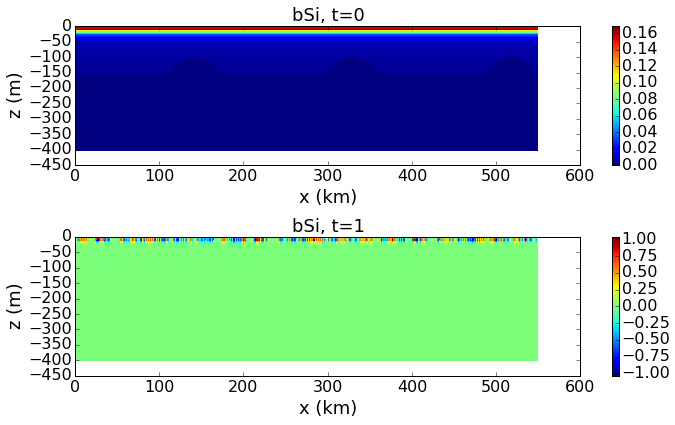

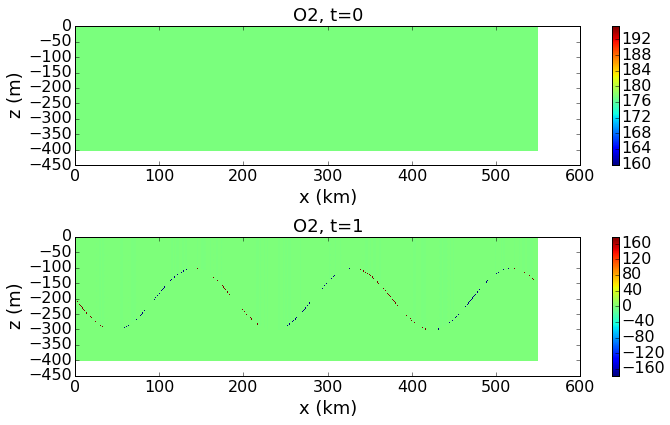

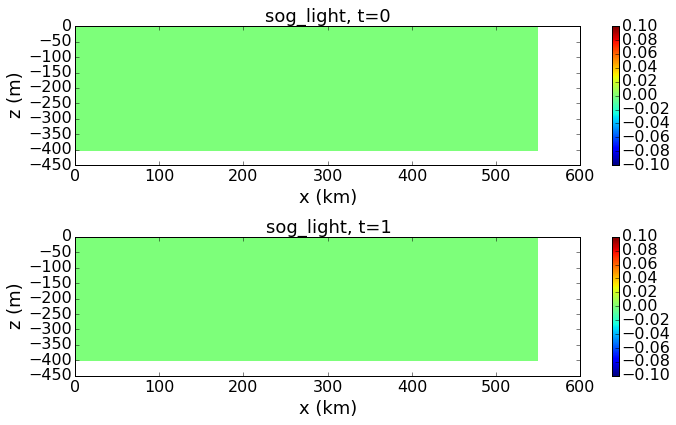

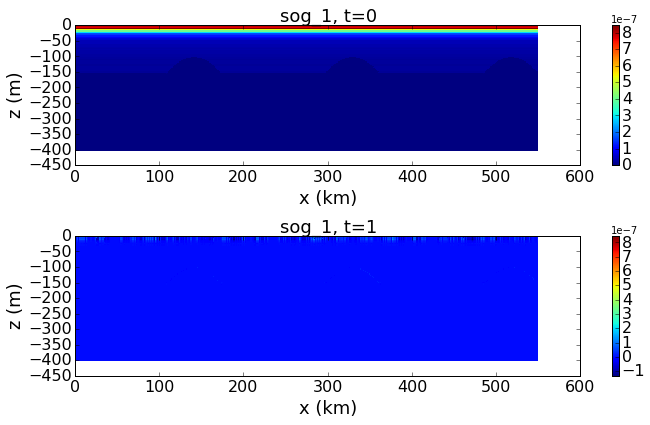

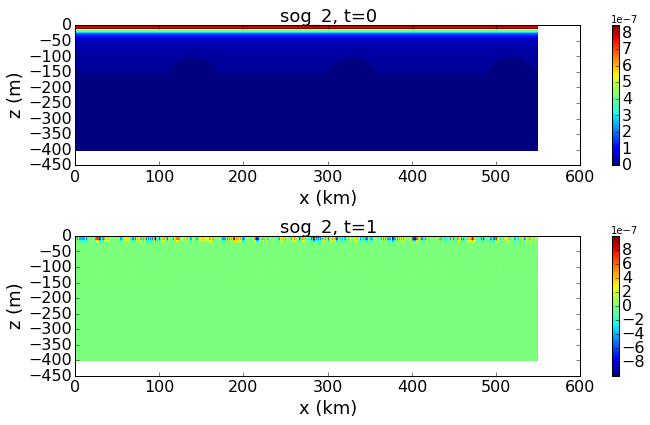

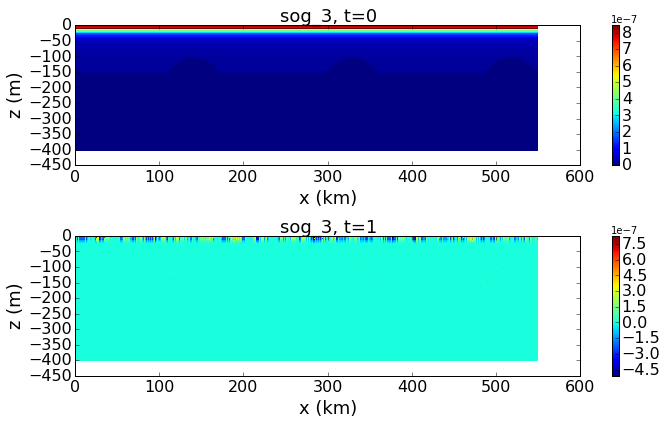

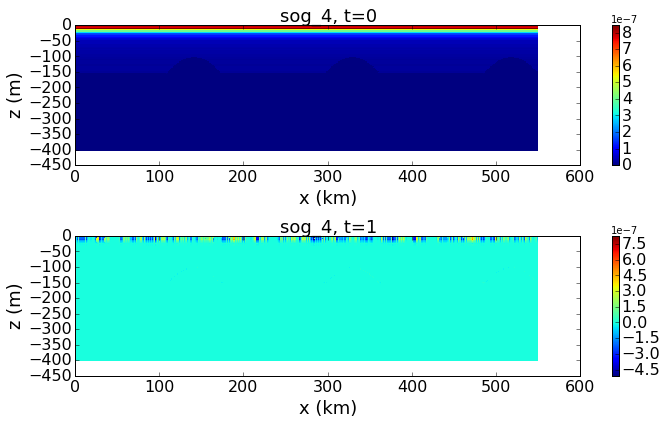

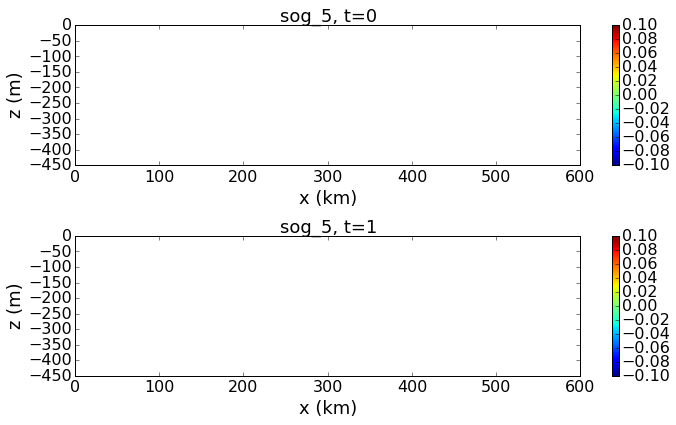

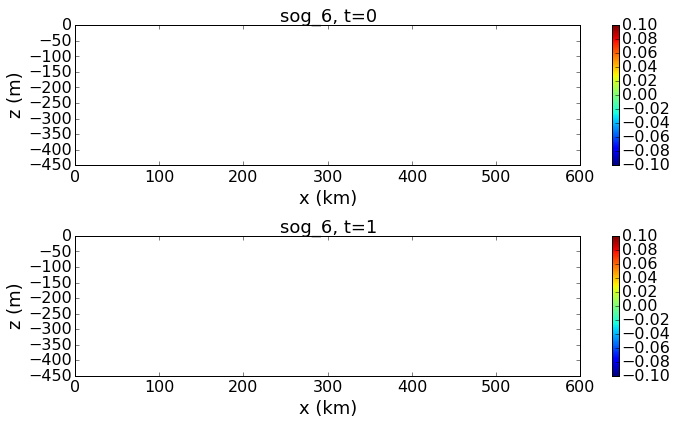

In [7]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik)
        
        #mesh0=axs[0].pcolormesh(xx[20:,:],zz[20:,:],f.variables[ik][0,20:,5,:])
        mesh0=axs[0].pcolormesh(xx[:,:],zz[:,:],f.variables[ik][0,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        mesh1=axs[1].pcolormesh(xx[:,1:],zz[:,1:],f.variables[ik][10,:,5,1:]-f.variables[ik][10,:,5,0:1099])#-f.variables[ik][0,:,5,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=1', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs[1].axis([0, 550, -50, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()

In [ ]:
        fig, axs = plt.subplots(2,1,figsize=(20,6))
        d=f.variables['sog_2'][0,:,5,:]-f.variables['sog_1'][0,:,5,:]
        #d[:,475]=0.01
        mesh0=axs[0].pcolormesh(xx,zz,d)
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('y (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title('NO3, t=1', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

In [ ]:
np.max(f.variables['sog_4'][0,:,:,:]-f.variables['sog_3'][0,:,:,:])

In [ ]:
np.max(f.variables['sog_3'][0,:,5,:]-f.variables['sog_2'][0,:,5,:])

In [ ]:
np.max(f.variables['sog_2'][0,:,5,:]-f.variables['sog_1'][0,:,5,:])

In [ ]:
np.max(f.variables['sog_1'][1,:,5,:]-f.variables['sog_4'][0,:,5,:])

In [ ]:
np.min(f.variables['sog_5'][:,:,:,:])

In [ ]:
np.max(f.variables['sog_6'][:,:,:,:])

In [ ]:
t=1
d=10
print(f.variables['PHY'][t,d,5,0:6])
print(f.variables['PHY'][t,d,5,100:106])
print(f.variables['PHY'][t,d,5,500:506])
print(f.variables['PHY'][t,d,5,900:906])

In [ ]:

for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik+','+str(np.min(f.variables[ik][e-1,:,:,:]))+','+str(np.min(f.variables[ik][e-1,:,:,:])))
        mesh0=axs[0].pcolormesh(tt/3600/24,tz,f.variables[ik][0:e,:,5,800].conj().transpose())
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('time (days)', fontsize=18)
        axs[0].set_title(ik + ', River End', fontsize=18)
        axs[0].autoscale(tight='True')
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        plt.tight_layout()
        
        #mesh1=axs[1].pcolormesh(tt/3600/24,tz,f.variables[ik][0:e,:,5,1095].conj().transpose()- \
        #                        f.variables[ik][0:e,:,5,5].conj().transpose())
        #cb1=fig.colorbar(mesh1,ax=axs[1])
        #axs[1].set_ylabel('z (m)', fontsize=18)
        #axs[1].set_xlabel('time (days)', fontsize=18)
        #axs[1].set_title(ik + ', Difference River - Closed Ends', fontsize=18)
        #axs[1].autoscale(tight='True')
        #plt.setp(axs[1].get_xticklabels(),fontsize=16)
        #plt.setp(axs[1].get_yticklabels(),fontsize=16)
        #cb1.ax.tick_params(labelsize=16)
        #plt.tight_layout()
